In [79]:
import pandas as pd
import numpy as np
import math
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 500
dat_orig = pd.read_excel("2018_sales.xlsx", header = 1)
dat_orig.fillna(method='ffill', inplace=True)
dat_orig = dat_orig.filter(regex=r'(Wk.|Unnamed: 0|Unnamed: 1|Unnamed: 2)')
dat_orig.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Feb Wk. 1 2019,Feb Wk. 2 2019,Feb Wk. 3 2019,Feb Wk. 4 2019,Mar Wk. 5 2019,Mar Wk. 6 2019,Mar Wk. 7 2019,Mar Wk. 8 2019,Mar Wk. 9 2019,Apr Wk. 10 2019,Apr Wk. 11 2019,Apr Wk. 12 2019,Apr Wk. 13 2019,May Wk. 14 2019,May Wk. 15 2019,May Wk. 16 2019,May Wk. 17 2019,Jun Wk. 18 2019,Jun Wk. 19 2019,Jun Wk. 20 2019,Jun Wk. 21 2019,Jun Wk. 22 2019,...,Aug Wk. 28 2019,Aug Wk. 29 2019,Aug Wk. 30 2019,Sep Wk. 31 2019,Sep Wk. 32 2019,Sep Wk. 33 2019,Sep Wk. 34 2019,Sep Wk. 35 2019,Oct Wk. 36 2019,Oct Wk. 37 2019,Oct Wk. 38 2019,Oct Wk. 39 2019,Nov Wk. 40 2019,Nov Wk. 41 2019,Nov Wk. 42 2019,Nov Wk. 43 2019,Dec Wk. 44 2019,Dec Wk. 45 2019,Dec Wk. 46 2019,Dec Wk. 47 2019,Dec Wk. 48 2019,Jan Wk. 49 2019,Jan Wk. 50 2019,Jan Wk. 51 2019,Jan Wk. 52 2019
0,Direct,Sls Total FP Rtl,LY,2.6191e+06,3.11482e+06,1.26302e+06,3.10634e+06,4.94786e+06,4.48451e+06,1.99622e+06,6.10595e+06,4.65447e+06,3.4179e+06,2.12765e+06,6.02738e+06,4.56318e+06,6.46613e+06,3.41393e+06,2.93784e+06,4.20344e+06,2.78572e+06,4.24735e+06,2.99027e+06,1.95681e+06,1.80254e+06,...,2.19364e+06,1.81738e+06,3.37993e+06,3.81247e+06,4.72602e+06,5.48783e+06,2.97255e+06,5.34449e+06,4.57149e+06,3.99308e+06,4.0983e+06,5.41473e+06,5.39372e+06,4.27014e+06,7.18727e+06,1.04607e+07,5.25634e+06,4.21524e+06,2.35427e+06,1.51287e+06,1.65111e+06,3.40117e+06,1.73363e+06,773961,2.12887e+06
1,Direct,Sls Total MD Rtl,LY,418697,1.28096e+06,2.86295e+06,1.49025e+06,1.09141e+06,1.85633e+06,2.34381e+06,1.21474e+06,1.76859e+06,613653,1.55391e+06,1.23227e+06,1.86073e+06,1.30668e+06,1.14679e+06,2.1711e+06,1.99288e+06,1.30856e+06,809572,727637,3.25918e+06,3.70596e+06,...,1.60537e+06,1.29413e+06,2.24379e+06,1.83228e+06,630941,424986,635694,820040,775590,1.00772e+06,1.01295e+06,902646,939332,1.66965e+06,1.00221e+06,1.57471e+06,964273,743994,965570,2.14527e+06,2.19711e+06,1.87944e+06,1.42259e+06,2.46773e+06,591970
2,Direct,Sls Total Rtl,LY,3.03779e+06,4.39577e+06,4.12597e+06,4.59658e+06,6.03927e+06,6.34084e+06,4.34003e+06,7.32069e+06,6.42306e+06,4.03155e+06,3.68156e+06,7.25965e+06,6.42391e+06,7.77282e+06,4.56072e+06,5.10894e+06,6.19632e+06,4.09429e+06,5.05692e+06,3.7179e+06,5.21599e+06,5.5085e+06,...,3.79901e+06,3.11151e+06,5.62372e+06,5.64475e+06,5.35696e+06,5.91282e+06,3.60824e+06,6.16453e+06,5.34708e+06,5.0008e+06,5.11125e+06,6.31738e+06,6.33306e+06,5.93978e+06,8.18947e+06,1.20354e+07,6.22062e+06,4.95924e+06,3.31984e+06,3.65814e+06,3.84822e+06,5.28061e+06,3.15622e+06,3.24169e+06,2.72084e+06
3,Direct,Sls Total FP U,LY,45660,59187,18413,50013,96095,88177,35225,114460,88038,64415,37244,103743,76577,131041,69266,46402,69532,48981,90057,65149,35758,28060,...,38540,38177,59254,58620,81046,101669,50305,90661,78539,64949,62570,79031,88187,70103,138995,232955,111309,92066,48745,21558,24758,66300,31738,11443,32693
4,Direct,Sls Total MD U,LY,6235,42613,116496,51186,31134,72162,97720,45198,79963,19158,46561,37299,72394,43733,37296,78712,78946,41226,24728,20221,125874,149246,...,73411,60906,92483,90384,13947,13202,14457,23533,25386,31463,24829,27926,33080,55953,34526,63617,35631,27840,34742,78473,92472,81460,68134,115223,19307


In [7]:
def format_sales(df):
    
    ids = list(df.iloc[:, np.r_[0:2]].columns)
    vals = list(df.iloc[:,3:].columns)
    
    melt = pd.melt(df, id_vars = ids, value_vars = vals, var_name = 'FISCAL_WK', value_name = 'SALES')
    
    melt.rename(columns={'Unnamed: 0':'Channel',
                      'Unnamed: 1': 'summation_type'
                          
                          }, 
                 inplace=True)
    
    sub = melt[melt['summation_type'] == "Sls Total Rtl"]
    sub[['Channel', 'SALES']].groupby('Channel').agg('sum')
    
    sub.FISCAL_WK = sub.FISCAL_WK.str[8:].copy()
    sub.FISCAL_WK = sub.FISCAL_WK.str[:2].copy()
    sub.FISCAL_WK = sub.FISCAL_WK.str.strip().copy()
    
    h1 = [1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6]
    h2 = [x+6 for x in h1]

    months = h1 + h2
    weeks = list(range(1, 53))
    qtrs = newList = [math.ceil(x / 3) for x in months]

    month_map = pd.DataFrame()
    month_map['FISCAL_MO'] = months
    month_map['FISCAL_WK'] = weeks
    month_map['FISCAL_QTR'] = qtrs
    
    sub.FISCAL_WK = sub.FISCAL_WK.astype(str).astype(int)
    sales_fcst = pd.merge(sub, month_map, on='FISCAL_WK', how='inner')
    
    return sales_fcst

In [8]:
fcst = format_sales(dat_orig)
fcst.head()

,Channel,summation_type,FISCAL_WK,SALES,FISCAL_MO,FISCAL_QTR
0,Direct,Sls Total Rtl,1,3.03779e+06,1,1
1,Retail,Sls Total Rtl,1,5.16914e+06,1,1
2,Direct,Sls Total Rtl,2,4.39577e+06,1,1
3,Retail,Sls Total Rtl,2,5.44481e+06,1,1
4,Direct,Sls Total Rtl,3,4.12597e+06,1,1


In [9]:
fcst.SALES.sum()

672500672.3399997

In [18]:
direct_total = fcst[['Channel', 'SALES', 'FISCAL_MO', 'FISCAL_QTR']].query('Channel == "Direct"').groupby(['FISCAL_MO', 'Channel','FISCAL_QTR']).agg('sum').reset_index()
retail_total = fcst[['Channel', 'SALES', 'FISCAL_MO', 'FISCAL_QTR']].query('Channel == "Retail"').groupby(['FISCAL_MO', 'Channel','FISCAL_QTR']).agg('sum').reset_index()
mth_sales = pd.concat([direct_total, retail_total])
mth_sales['Channel'] = np.where(mth_sales['Channel']=='Direct', 'D', 'R')
mth_sales['FISCAL_YR'] = 2018
mth_sales.head()

,FISCAL_MO,Channel,FISCAL_QTR,SALES,FISCAL_YR
0,1,D,1,16156122.03,2018
1,2,D,1,30463881.44,2018
2,3,D,1,21396678.68,2018
3,4,D,2,23638791.67,2018
4,5,D,2,23593602.43,2018


In [19]:
mth_sales_2019 = pd.read_pickle('month_2019')
mth_sales_2019['FISCAL_YR'] = 2019
mth_sales_2019.head()

,Channel,sales_segment,summation_type,FISCAL_WK,SALES,FISCAL_MO,FISCAL_QTR,FISCAL_YR
0,R,Retail Sales (Stores & Concierge),Actual (TY) / Forecast,1,5476461.31,1,1,2019
1,D,Direct Net Sales,Actual (TY) / Forecast,1,4089837.30,1,1,2019
2,R,Retail Sales (Stores & Concierge),Actual (TY) / Forecast,2,4662842.01,1,1,2019
3,D,Direct Net Sales,Actual (TY) / Forecast,2,3747693.15,1,1,2019
4,R,Retail Sales (Stores & Concierge),Actual (TY) / Forecast,3,5506713.02,1,1,2019


In [30]:
mth_sales2 = mth_sales_2019[['FISCAL_MO', 'Channel', 'FISCAL_QTR', 'SALES', 'FISCAL_YR']].query('FISCAL_MO <= 5')
all_sales = pd.concat([mth_sales, mth_sales2]).reset_index()

In [41]:
all_sales[['FISCAL_YR','SALES']].groupby('FISCAL_YR').agg('sum')

,SALES
FISCAL_YR,
2018,6.725007e+08
2019,2.975467e+08


## Read in customer file

In [50]:
mth_data = pd.read_csv('monthly_sales_to_custs_2019.csv').sort_values('Channel')
mth_data.head()

,FISCAL_YR,Channel,total_net_sales,total_custs,FISCAL_QTR,FISCAL_MO,recency_net_sales_total,recency_cust_total,Recency,chan_rec_sales_pct,chan_rec_cust_pct,chan_rec_seg_sales,chan_rec__seg_custs,Customer_Type,Segment,chan_rec_sales,chan_rec__custs,sales_pct,cust_pct,d_p_cust
0,2018,D,1.397545e+07,130751,1,1,5.689090e+05,6912,0,0.040708,0.052864,5.470167e+05,6489,NTB_1,1,5.782865e+05,6688,0.945927,0.970245,84.299070
117,2018,D,2.103208e+07,207167,4,11,2.179098e+06,25040,2,0.103608,0.120869,2.177850e+05,1352,React__Omni,_Omni,2.265600e+06,24107,0.096127,0.056083,161.083582
116,2018,D,2.103208e+07,207167,4,11,2.179098e+06,25040,2,0.103608,0.120869,2.047815e+06,22755,React_1,1,2.265600e+06,24107,0.903873,0.943917,89.994077
115,2018,D,2.512522e+07,223096,4,10,2.585508e+06,28197,2,0.102905,0.126390,1.842211e+05,1001,React__Omni,_Omni,2.649807e+06,27323,0.069522,0.036636,184.037015
114,2018,D,2.512522e+07,223096,4,10,2.585508e+06,28197,2,0.102905,0.126390,2.465586e+06,26322,React_1,1,2.649807e+06,27323,0.930478,0.963364,93.670160


In [71]:
compare = mth_data[['FISCAL_YR', 'FISCAL_MO', 'Channel', 'Customer_Type', 'Segment', 'Recency', 'd_p_cust', 'chan_rec_seg_sales', 'chan_rec__seg_custs']].reset_index()
compare['Recency'] = np.where(compare['Recency']==0, 'NTB', np.where(compare['Recency'] == 1, 'Existing', 'React')).copy()
compare['Channel'] = np.where(compare['Channel'] == 'D', 'Direct', 'Retail')
compare['Channel2'] = compare['Channel'] +  compare['Segment']
compare['Customer_Type'] = np.where(compare['Segment'] == '1', (compare['Recency'] + '_' + compare['Channel2']), compare['Recency'] + compare['Segment'])
compare.head()

,index,FISCAL_YR,FISCAL_MO,Channel,Customer_Type,Segment,Recency,d_p_cust,chan_rec_seg_sales,chan_rec__seg_custs,Channel2
0,0,2018,1,Direct,NTB_Direct1,1,NTB,84.299070,5.470167e+05,6489,Direct1
1,117,2018,11,Direct,React_Omni,_Omni,React,161.083582,2.177850e+05,1352,Direct_Omni
2,116,2018,11,Direct,React_Direct1,1,React,89.994077,2.047815e+06,22755,Direct1
3,115,2018,10,Direct,React_Omni,_Omni,React,184.037015,1.842211e+05,1001,Direct_Omni
4,114,2018,10,Direct,React_Direct1,1,React,93.670160,2.465586e+06,26322,Direct1


In [126]:
comp = compare[['FISCAL_YR', 'FISCAL_MO', 'chan_rec__seg_custs', 'chan_rec_seg_sales', 'd_p_cust', 'Customer_Type']].query('FISCAL_MO <= 5')
comp = comp.groupby(['Customer_Type', 'FISCAL_MO', 'FISCAL_YR']).agg('sum').reset_index()
comp['d_p_cust2'] = comp.chan_rec_seg_sales / comp.chan_rec__seg_custs
comp

,Customer_Type,FISCAL_MO,FISCAL_YR,chan_rec__seg_custs,chan_rec_seg_sales,d_p_cust,d_p_cust2
0,Existing_Direct1,1,2018,96073,1.097118e+07,114.196292,114.196292
1,Existing_Direct1,1,2019,96006,1.096426e+07,114.203863,114.203863
2,Existing_Direct1,2,2018,140565,1.698745e+07,120.851202,120.851202
3,Existing_Direct1,2,2019,127347,1.622484e+07,127.406519,127.406519
4,Existing_Direct1,3,2018,108327,1.386314e+07,127.974937,127.974937
5,Existing_Direct1,3,2019,120675,1.506116e+07,124.807588,124.807588
6,Existing_Direct1,4,2018,118626,1.483461e+07,125.053613,125.053613
7,Existing_Direct1,4,2019,122718,1.520403e+07,123.894065,123.894065
8,Existing_Direct1,5,2018,134063,1.570234e+07,117.126608,117.126608
9,Existing_Direct1,5,2019,127906,2.061050e+07,161.137842,161.137842


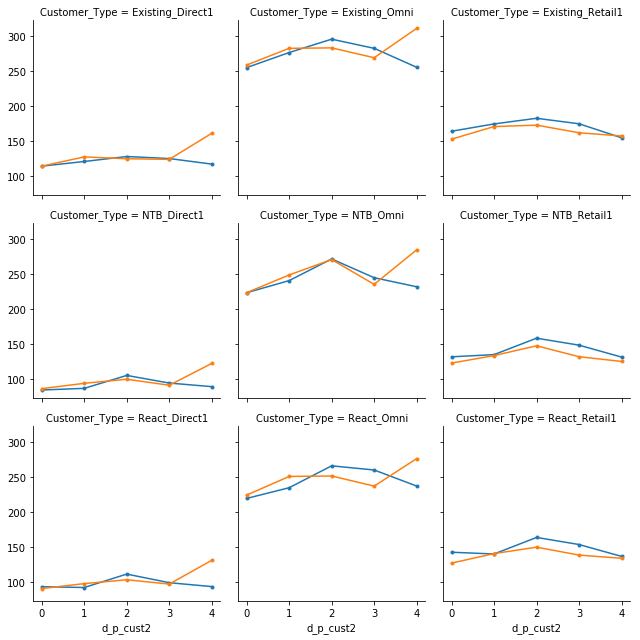

In [127]:
g = sns.FacetGrid(comp, col = "Customer_Type", col_wrap = 3, hue = 'FISCAL_YR')
g = g.map(plt.plot, 'd_p_cust2', marker = ".")

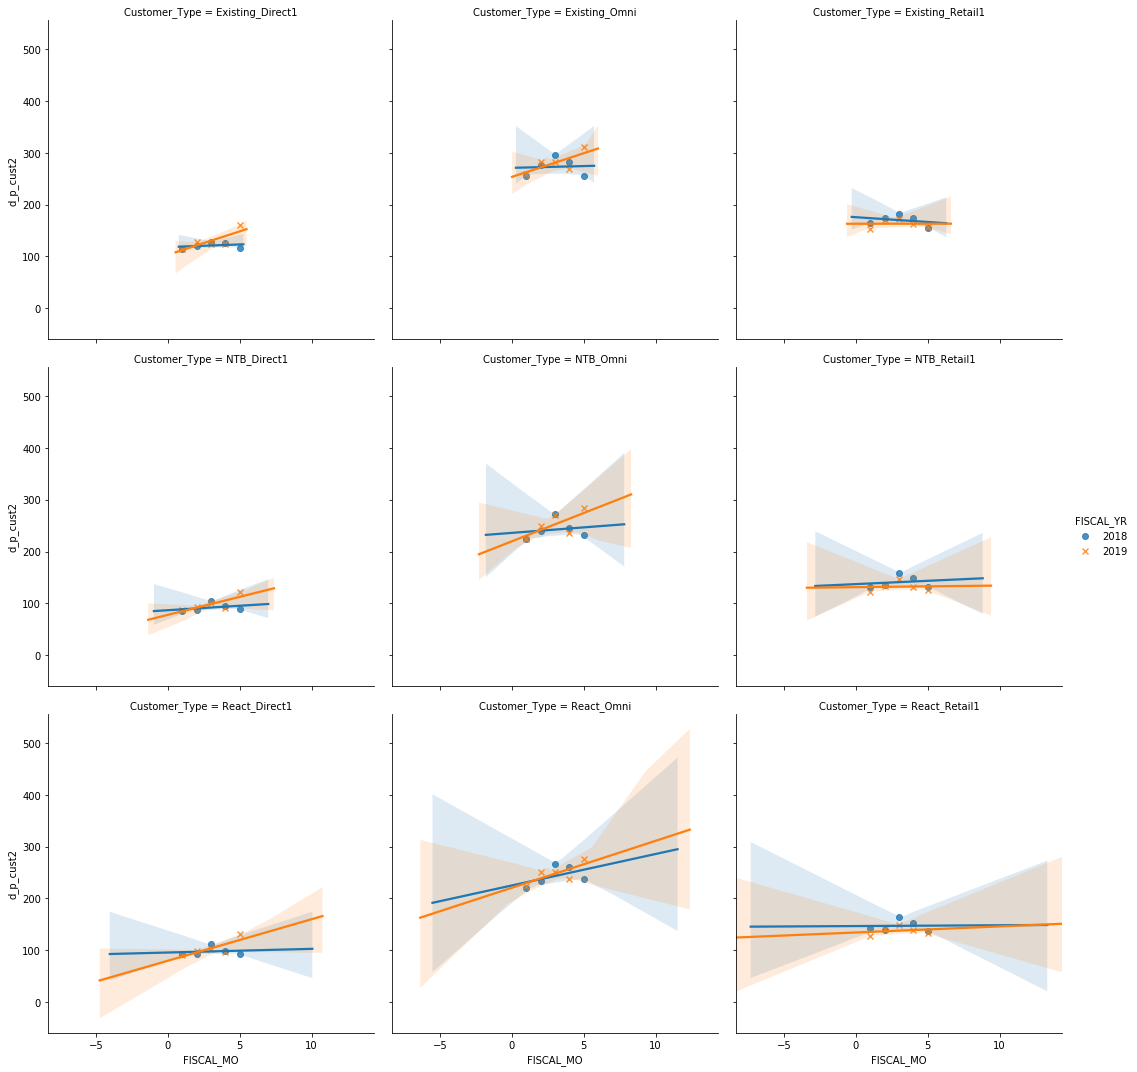

In [128]:
g = sns.lmplot(data = comp, 
              col = 'Customer_Type', 
              col_wrap = 3, 
              hue='FISCAL_YR',
               x = 'FISCAL_MO',
               y = 'd_p_cust2',
              markers = ["o","x"]
                 )
# g = g.map(plt.plot, 'd_p_cust')
# g.add_legend()